#### P - 1
#### Customer Service Requests Analysis
#### Tasks to be performed
#### 1. Import a 311 NYC service request.

In [1]:
 # Import necessary packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import datetime

In [2]:
# Using set_option function to display the needed no. of rows and columns
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',800)
#To ignore warnings
warnings.simplefilter('ignore')


In [3]:
# Load the dataset using pandas
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [4]:
# Head method to view first 3 rows of the dataset
df.head(4)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,...,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"


In [5]:
# Understand the dataset
df.shape

(300698, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
# Changing the column names for easy access
df.columns = df.columns.str.replace(" ","_").str.lower()

In [9]:
# Create new dataset with necessary columns
nyc_dataset = df[['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type'
,'incident_zip','incident_address','street_name','cross_street_1','cross_street_2','address_type','city','status','due_date'
,'resolution_description','resolution_action_updated_date','community_board','borough','x_coordinate_(state_plane)'
,'y_coordinate_(state_plane)','park_borough','latitude','longitude','location']]

In [10]:
# Check for duplicates and NA values
nyc_dataset.duplicated().sum()

0

In [11]:
nyc_dataset.isna().sum()

unique_key                            0
created_date                          0
closed_date                        2164
agency                                0
agency_name                           0
complaint_type                        0
descriptor                         5914
location_type                       131
incident_zip                       2615
incident_address                  44410
street_name                       44410
cross_street_1                    49279
cross_street_2                    49779
address_type                       2815
city                               2614
status                                0
due_date                              3
resolution_description                0
resolution_action_updated_date     2187
community_board                       0
borough                               0
x_coordinate_(state_plane)         3540
y_coordinate_(state_plane)         3540
park_borough                          0
latitude                           3540


In [12]:
# Drop NA values in necessary columns
nyc_dataset.dropna(subset=['city','latitude'],inplace=True)

In [13]:
# Write the cleaned dataset back
nyc_dataset.to_csv('Nyc_cleaned.csv',index=False)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
#### Customer Service Requests Analysis
#### Tasks to be performed
#### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime).

In [14]:
# Load the cleaned dataset
nyc = pd.read_csv('Nyc_cleaned.csv',parse_dates=['created_date','closed_date','resolution_action_updated_date'])
nyc.head(4)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,status,due_date,resolution_description,resolution_action_updated_date,community_board,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),park_borough,latitude,longitude,location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,2016-01-01 04:51:00,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,2016-01-01 07:43:00,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"


In [15]:
# Calculating the response time in hrs and in minutes
nyc['request_closing_time_hrs']= nyc['closed_date'].values - nyc['created_date'].values
nyc['request_closing_time_mins']= nyc['request_closing_time_hrs']/np.timedelta64(1,'m')

In [16]:
nyc.head(5)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,status,due_date,resolution_description,resolution_action_updated_date,community_board,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),park_borough,latitude,longitude,location,request_closing_time_hrs,request_closing_time_mins
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,2016-01-01 04:51:00,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,2016-01-01 07:43:00,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,2016-01-01 03:24:00,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,207.033333


#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
#### Customer Service Requests Analysis
#### Tasks to be performed
#### 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

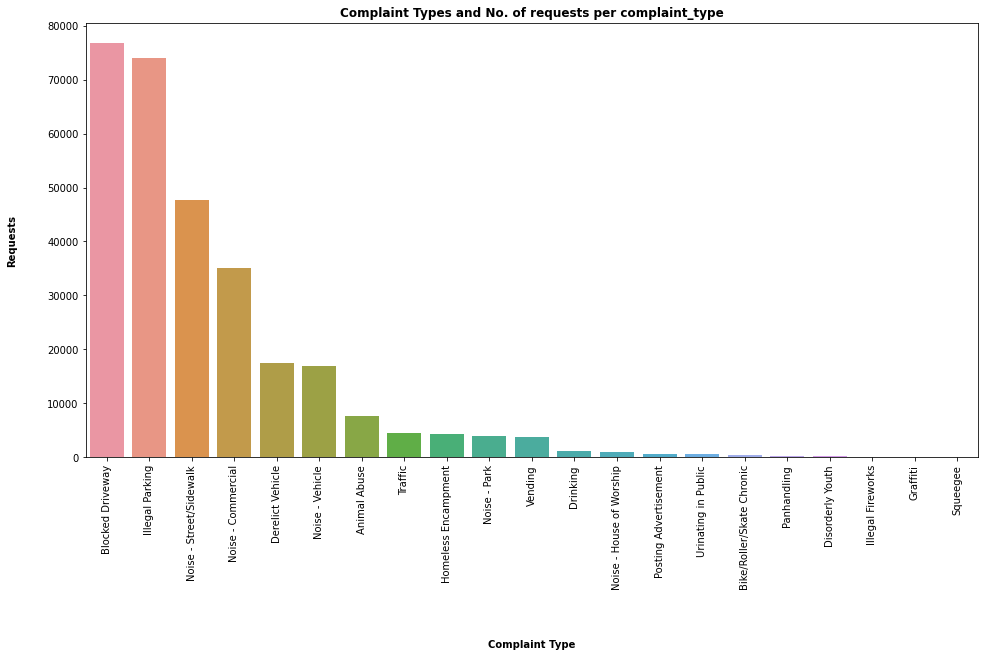

In [17]:
# Visualizing complaint types based on the no. of requests
nyc['city'] = nyc['city'].str.lower().str.replace(" ","_")
txt={'weight':'bold'}
plt.figure(figsize=(16,8))
sns.countplot(x='complaint_type',data=nyc,order=nyc['complaint_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Complaint Types and No. of requests per complaint_type",fontdict=txt)
plt.xlabel('Complaint Type',fontdict=txt,labelpad=50)
plt.ylabel('Requests',fontdict=txt,labelpad=30)
plt.show()

  Conclusion 1 - Most Number of complaint requests received is for Blocked Driveway Followed by that is illegal parking.



#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####

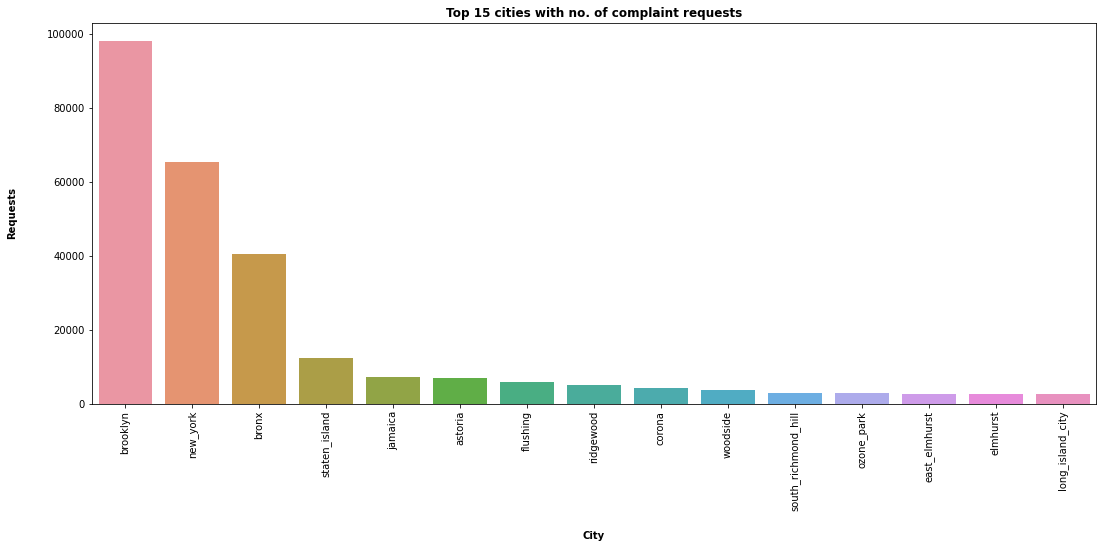

In [18]:
# Visualizing no. of requests from top 15 cities
city_top15 = nyc['city'].value_counts().head(15)
top15 = city_top15.index
txt={'weight':'bold'}
plt.figure(figsize=(18,7))
sns.countplot(x='city',data=nyc[nyc.city.isin(top15)],order=top15)
plt.title("Top 15 cities with no. of complaint requests",fontdict=txt)
plt.xlabel('City',fontdict=txt,labelpad=20)
plt.xticks(rotation=90)
plt.ylabel('Requests',fontdict=txt,labelpad=30)
plt.show()

 Conclusion 2 - Most Number of complaint requests received are from the city Brooklyn .



#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####

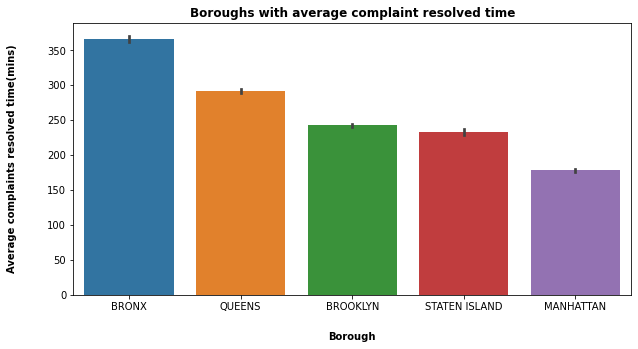

In [19]:
# visualizing Boroughs with average response time
txt={'weight':'bold'}
plt.figure(figsize=(10,5))
sns.barplot(x='borough',y='request_closing_time_mins',data=nyc,order=['BRONX','QUEENS','BROOKLYN','STATEN ISLAND','MANHATTAN'])
plt.title("Boroughs with average complaint resolved time",fontdict=txt)
plt.xlabel("Borough",fontdict=txt,labelpad=20)
plt.ylabel("Average complaints resolved time(mins)",fontdict=txt,labelpad=30)
plt.show()

 Conclusion 3 - Manhattan Borough has the minimum average complaint response time and Bronx Borough has the maximum average complaint response time.



#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####

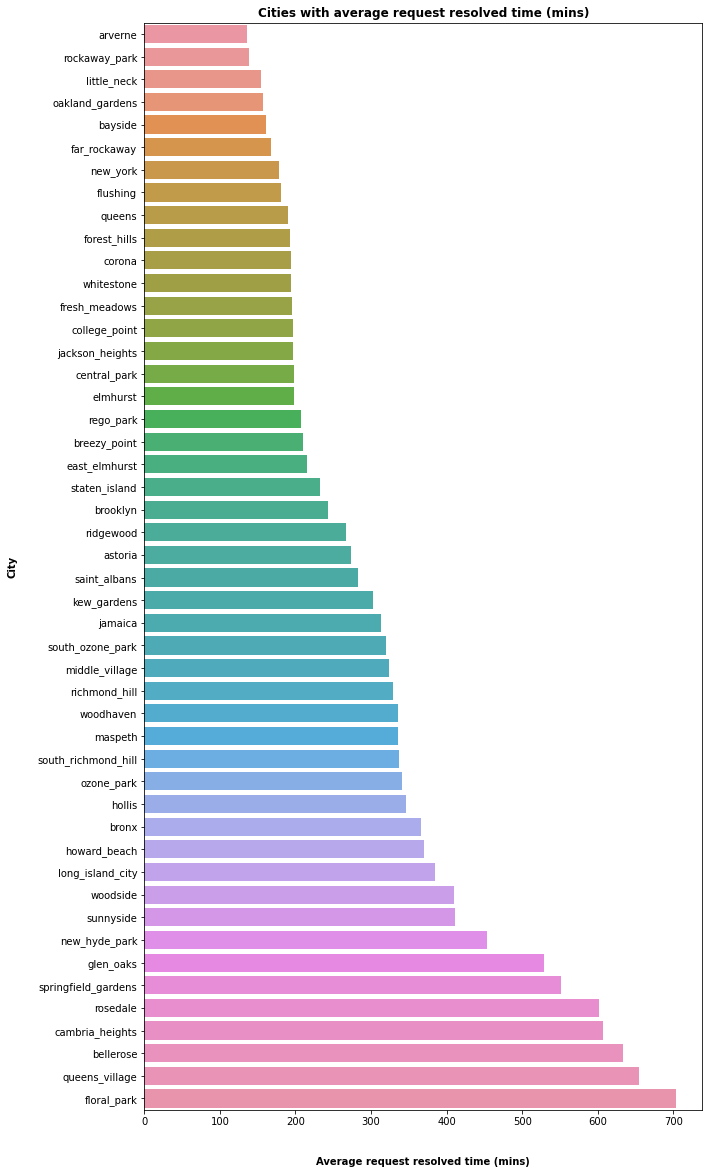

In [20]:
# visualizing Cities with average response time
viz1 = nyc[['city','request_closing_time_mins']]
c1 = viz1.groupby('city')['request_closing_time_mins'].mean().to_frame()
c1 = c1.sort_values('request_closing_time_mins')
c1['city'] = c1.index
txt={'weight':'bold'}
plt.figure(figsize=(10,20))
sns.barplot(y='city',x='request_closing_time_mins',data=c1)
plt.title("Cities with average request resolved time (mins)",fontdict=txt)
plt.ylabel("City",fontdict=txt,labelpad=20)
plt.xlabel("Average request resolved time (mins)",fontdict=txt,labelpad=30)
plt.show()

 Conclusion 4 - Arverne has the minimum complaint request respond time and Floral Park has the maximum complaint request respond time.


#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####

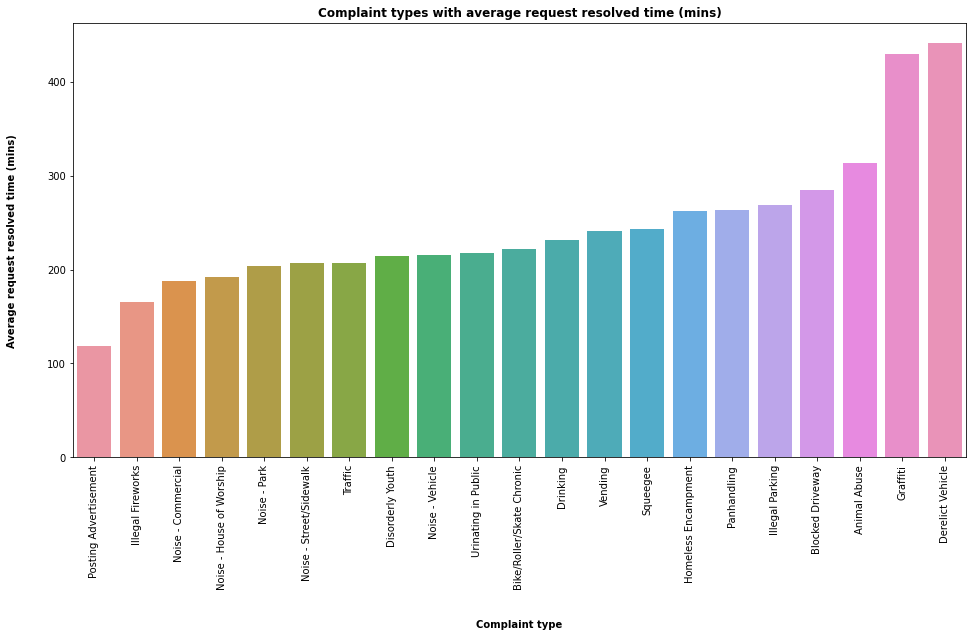

In [21]:
# visualizing Complaint types with average response time
viz2 = nyc[['complaint_type','request_closing_time_mins']]
c2 = viz2.groupby('complaint_type')['request_closing_time_mins'].mean().to_frame()
c2 = c2.sort_values('request_closing_time_mins')
c2['complaint_type'] = c2.index
txt={'weight':'bold'}
plt.figure(figsize=(16,8))
sns.barplot(x='complaint_type',y='request_closing_time_mins',data=c2)
plt.title("Complaint types with average request resolved time (mins)",fontdict=txt)
plt.xlabel("Complaint type",fontdict=txt,labelpad=30)
plt.ylabel("Average request resolved time (mins)",fontdict=txt,labelpad=30)
plt.xticks(rotation=90)
plt.show()

 Conclusion 5 - Posting Advertistment complaints are responded faster and Derelict Vehicle complaints are responded slower.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####

<Figure size 1440x720 with 0 Axes>

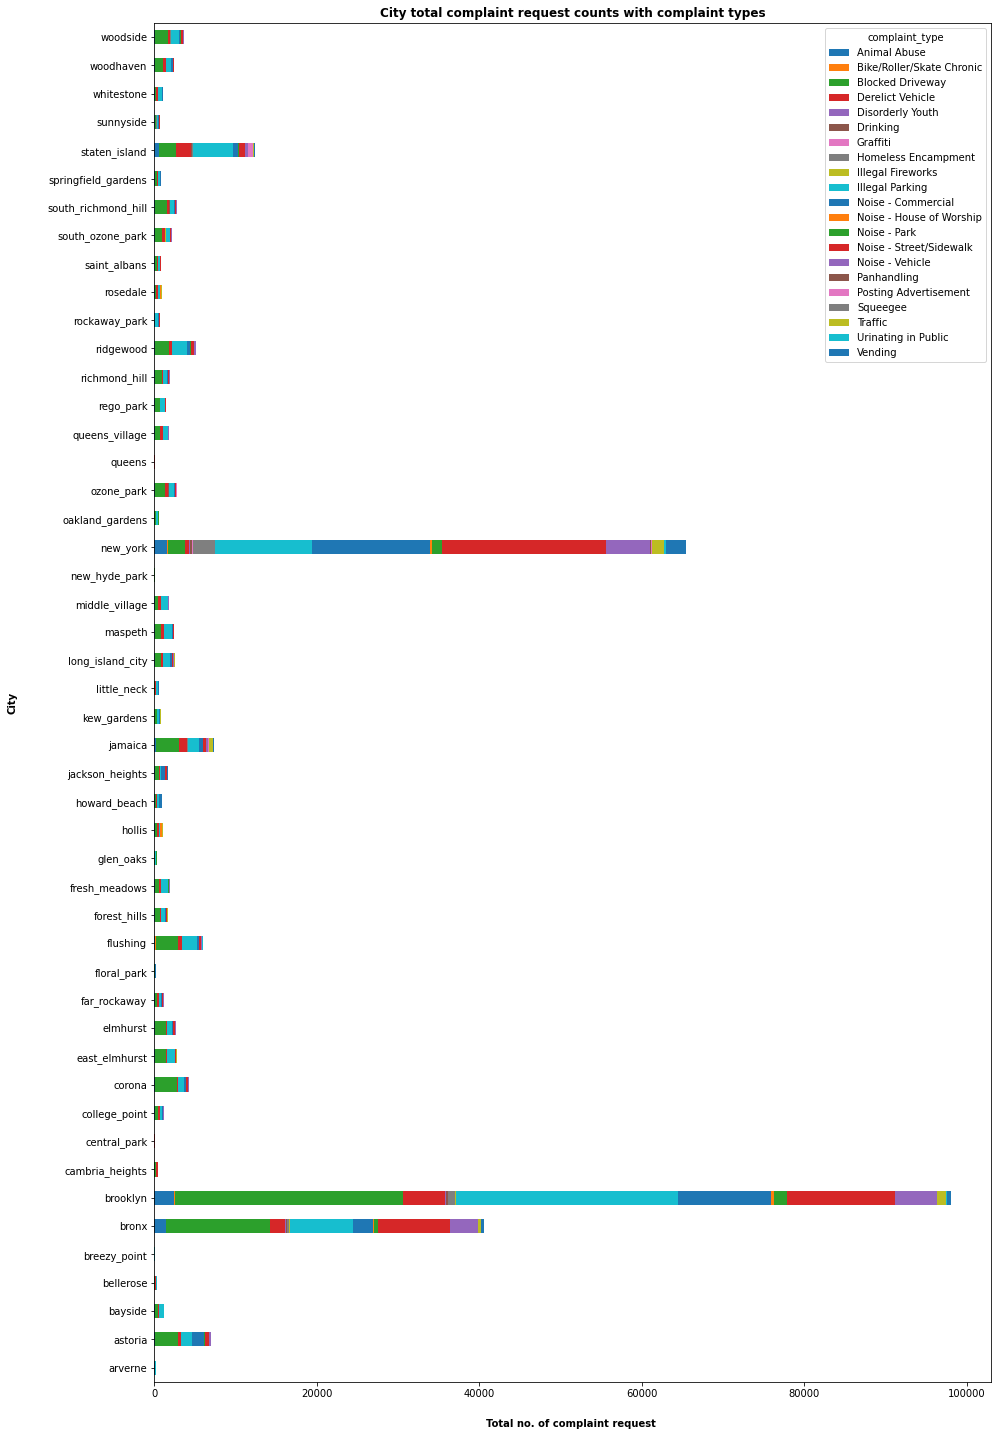

In [22]:
# visualizing Cities with number of complaint requests received and its complaint types
city_complaint_types = pd.crosstab(index=nyc['city'],columns=nyc['complaint_type'])
txt={'weight':'bold'}
plt.figure(figsize=(20,10))
city_complaint_types.plot(kind='barh',figsize=(15,25),stacked=True)
plt.title("City total complaint request counts with complaint types",fontdict=txt)
plt.xlabel("Total no. of complaint request ",fontdict=txt,labelpad=20)
plt.ylabel("City",fontdict=txt,labelpad=30)
plt.show()

 Conclusion 6 - Brooklyn has the maximum complaint types received and it has the maximum number of complaints requested as well than any other city.


  

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
#### Customer Service Requests Analysis
#### Tasks to be performed
#### 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [24]:
# Grouping complaints by cities and finiding mean response time for each complaint type
# Sorting the mean response time of different complaint types for each city
city_complaintype_group = nyc.groupby(['city','complaint_type'])['request_closing_time_mins'].mean().unstack(level=1)
city_complaintype_group = city_complaintype_group.T
col = city_complaintype_group.columns
for i in col:
 exec("{} = city_complaintype_group['{}'].sort_values()".format(i,i))

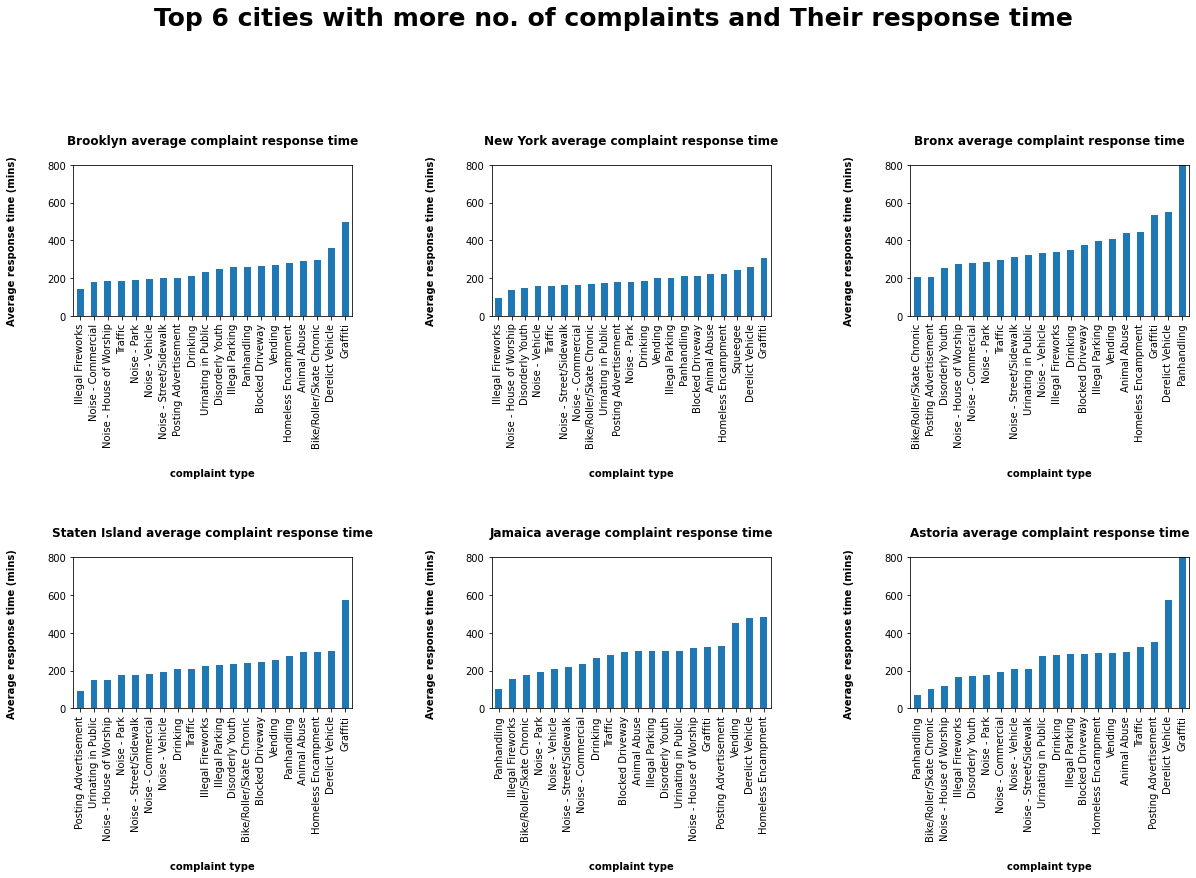

In [25]:
# Visualizing the top 6 cities with the mean response time sorted for different complaint types
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=1.6,wspace=0.5)
plt.suptitle("Top 6 cities with more no. of complaints and Their response time",fontweight="bold",fontsize="25",y=1.1)
txt={'weight':'bold'}
plt.subplot(2,3,1)
plt.title('Brooklyn average complaint response time',fontdict=txt,y=1.1)
brooklyn.dropna().plot.bar()
plt.xlabel('complaint type',fontdict=txt,labelpad=20)
plt.ylabel('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)
plt.subplot(2,3,2)
plt.title('New York average complaint response time',fontdict=txt,y=1.1)
new_york.dropna().plot.bar()
plt.xlabel('complaint type',fontdict=txt,labelpad=20)
plt.ylabel('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)
plt.subplot(2,3,3)
plt.title('Bronx average complaint response time',fontdict=txt,y=1.1)
bronx.dropna().plot.bar()
plt.xlabel('complaint type',fontdict=txt,labelpad=20)
plt.ylabel('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)
plt.subplot(2,3,4)
plt.title('Staten Island average complaint response time',fontdict=txt,y=1.1)
staten_island.dropna().plot.bar()
plt.xlabel('complaint type',fontdict=txt,labelpad=20)
plt.ylabel('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)
plt.subplot(2,3,5)
plt.title('Jamaica average complaint response time',fontdict=txt,y=1.1)
jamaica.dropna().plot.bar()
plt.xlabel('complaint type',fontdict=txt,labelpad=20)
plt.ylabel('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)
plt.subplot(2,3,6)
plt.title('Astoria average complaint response time',fontdict=txt,y=1.1)
astoria.dropna().plot.bar()
plt.xlabel('complaint type',fontdict=txt,labelpad=20)
plt.ylabel('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)
plt.show()

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
#### Customer Service Requests Analysis
#### Tasks to be performed
#### 5. Perform a statistical test for the following:
#### Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

#### * Whether the average response time across complaint types is similar or not (overall)
#### * Are the type of complaint or service requested and location related?

In [27]:
# Dropping NA values for statistical testing
nyc.dropna(subset=['request_closing_time_hrs','request_closing_time_mins'],inplace=True)

#### F-Test
#### Testing at Confidence level(95%) => alpha value = 0.05
#### * Null Hypothesis : H0 : There is no significant difference in average response time across different complaint types
#### * Alternate Hypothesis : H1 : There is a significant difference in average response time across different complaint types

In [28]:
# Storing mean response time for various complaint types
complaints = nyc['complaint_type'].value_counts().index
for i in range(len(complaints)):
 exec("sample{} = nyc.loc[(nyc['complaint_type'] == '{}') , 'request_closing_time_mins']".format(i+1,complaints[i]))

In [29]:
# Performing F-statics
fscore,pvalue = stats.f_oneway(sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,
                               sample10,sample11,sample12,sample13,sample14,sample15,sample16,sample17,sample18,sample19,sample20,sample21)
print("score : {:.2f} , pvalue : {:.2f}".format(fscore,pvalue))


score : 407.78 , pvalue : 0.00


Here , pvalue (0.00) < alpha value(0.05)
We reject our Null Hypothesis
- There is a significant difference in average response time across different complaint types
(i.e) the average response time across different complaint types is not similar (overall)


#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####
#### Chi-Square Test of Independence
#### Testing at Confidence level(95%) => alpha value = 0.05
#### * Null Hypothesis : H0 : There is no significant relation between type of complaint and location
#### * Alternate Hypothesis : H1 : There is some significant relation between type of complaint and location

In [30]:
# Performing Chi-square test of independence
location_complaint_type = pd.crosstab(nyc['complaint_type'],nyc['location'])

In [31]:
cscore,pval,df,et = stats.chi2_contingency(location_complaint_type)
print("score : {:.2f} , pvalue : {:.2f}".format(cscore,pval))

score : 4160248.36 , pvalue : 0.00


Here , pvalue (0.00) < alpha value(0.05)
We reject our Null Hypothesis
- There is some significant relation between type of complaint and location (i.e) The type
 of complaint or service requested and the location are related
